In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from libs.MSCTDdataset import MSCTD
from torchvision.transforms import Compose, CenterCrop, ToTensor, Resize,RandomApply,RandomRotation,RandomCrop, Normalize
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle 
import torch
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
transforms = Compose([])

root_dir = '.'

training_data = MSCTD(
        mode='train', 
        transformer=transforms,
        download=False,
        root_dir=root_dir,
        read_mode="single")

valid_data = MSCTD(
        mode='validation',
        transformer=transforms,
        download=False,
        root_dir=root_dir,
        read_mode="single")

test_data = MSCTD(
        mode='test',
        transformer=transforms,
        download=False,
        root_dir=root_dir,
        read_mode="single")

# A) Sentiment analysis with face

## part 1-1 & 2-1: Face Extraction with Data Augmentation

In [ ]:
# face Extractor with data augmentation transforms
from libs.faceExtractor import faceExtractor

In this part, we extract faces from images and apply all data augmentation transforms to the face of training images. then we save them in ./faceDatasets/ directory in separate

In data augmentation, we use three stochastic transforms from PRIME ( spatial=`diffeo`, spectral=`filt`, color=`color` ) and apply them separately with different config in config.json

In [5]:
# face extraction from training image with their augmentaion
face_train = faceExtractor(rootDir=root_dir, mode='train',augmentation=True)
face_train.run(training_data)
print(f"[train] number of images that has no detected face in it :{face_train.fault}")

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/user01/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/w600k_r50.onnx recognition
set det-size: (640, 640)


100%|██████████| 20240/20240 [35:17<00:00,  9.56it/s] 

[train] number of images that has no detected face in it :2200


In [5]:
# face extraction from validation image without their augmentaion
face_validation = faceExtractor(rootDir=root_dir, mode='validation',augmentation=False)
face_validation.run(valid_data)
print(f"[validation] number of images that has no detected face in it :{face_validation.fault}")

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/user01/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/w600k_r50.onnx recognition
set det-size: (640, 640)


100%|██████████| 5063/5063 [03:47<00:00, 22.29it/s]

[validation] number of images that has no detected face in it :476


In [6]:
# face extraction from test image without their augmentaion
face_test = faceExtractor(rootDir=root_dir, mode='test', augmentation=False)
face_test.run(test_data)
print(f"[test] number of images that has no detected face in it :{face_test.fault}")

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/user01/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/w600k_r50.onnx recognition
set det-size: (640, 640)


100%|██████████| 5067/5067 [04:16<00:00, 19.78it/s]

[test] number of images that has no detected face in it :390


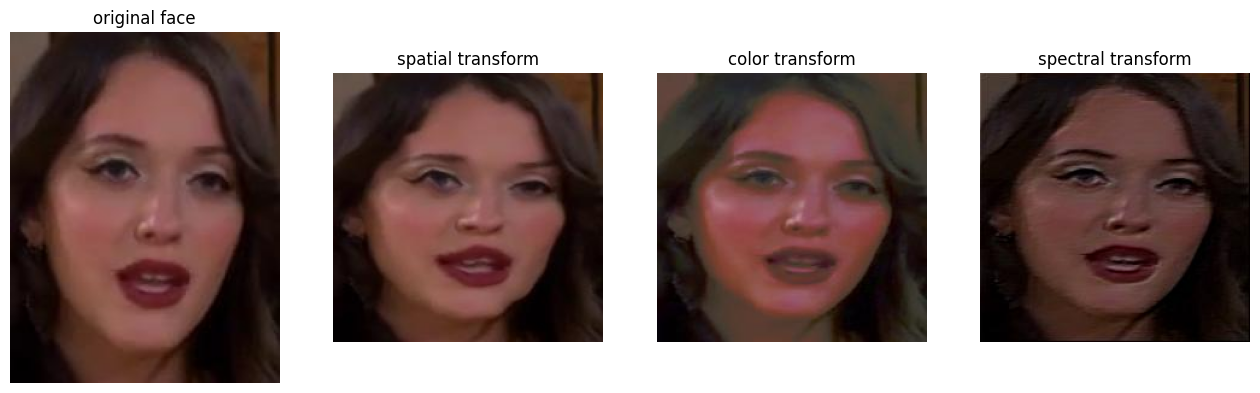

In [32]:
image_num = 756 

plt.figure(figsize=(16,12))
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(cv2.imread(f"{root_dir}/faceDataset/originalFace/train/{image_num}_0.jpg"), cv2.COLOR_BGR2RGB));
plt.title('original face')
plt.axis('off');

plt.subplot(1,4,2)
plt.imshow(cv2.cvtColor(cv2.imread(f"{root_dir}/faceDataset/augmentationFace/train/{image_num}_0_0.jpg"), cv2.COLOR_BGR2RGB));
plt.title('spatial transform')
plt.axis('off');

plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(cv2.imread(f"{root_dir}/faceDataset/augmentationFace/train/{image_num}_0_1.jpg"), cv2.COLOR_BGR2RGB));
plt.title('color transform')
plt.axis('off');

plt.subplot(1,4,4)
plt.imshow(cv2.cvtColor(cv2.imread(f"{root_dir}/faceDataset/augmentationFace/train/{image_num}_0_2.jpg"), cv2.COLOR_BGR2RGB));
plt.title('spectral transform')
plt.axis('off');


## part 1-2: Training a CNN on face 

In [9]:
from faceAnalysis import faceSentiment

In [5]:
faceSentiment.train(batch_size=128, lr=1.e-3, epochs=20, augmentation=[],\
                     workers=2, num_head=4, Facedataset_path='.',\
                        model_path=os.path.join(root_dir,"checkpoints"))

Whole train set size: 18256
Validation set size: 4587


  0%|          | 0/20 [00:20<?, ?it/s]

[Epoch 1] Training accuracy: 0.3863. Loss: 2.089. LR 0.001000


  0%|          | 0/20 [00:24<?, ?it/s]

[Epoch 1] Validation accuracy:0.3658. bacc:0.3385. Loss:1.889
best_acc:0.3658


  5%|▌         | 1/20 [00:24<07:46, 24.54s/it]

Model saved in : ./checkpoints/faceDAN.pth


  5%|▌         | 1/20 [00:43<07:46, 24.54s/it]

[Epoch 2] Training accuracy: 0.3935. Loss: 1.847. LR 0.000994


 10%|█         | 2/20 [00:46<06:54, 23.05s/it]

[Epoch 2] Validation accuracy:0.3623. bacc:0.3343. Loss:1.840
best_acc:0.3658


 10%|█         | 2/20 [01:05<06:54, 23.05s/it]

[Epoch 3] Training accuracy: 0.3933. Loss: 1.806. LR 0.000976


 10%|█         | 2/20 [01:08<06:54, 23.05s/it]

[Epoch 3] Validation accuracy:0.3663. bacc:0.3383. Loss:1.813
best_acc:0.3663


 15%|█▌        | 3/20 [01:09<06:29, 22.89s/it]

Model saved in : ./checkpoints/faceDAN.pth


 15%|█▌        | 3/20 [01:28<06:29, 22.89s/it]

[Epoch 4] Training accuracy: 0.3936. Loss: 1.778. LR 0.000946


 20%|██        | 4/20 [01:31<06:02, 22.65s/it]

[Epoch 4] Validation accuracy:0.3647. bacc:0.3364. Loss:1.786
best_acc:0.3663


 20%|██        | 4/20 [01:50<06:02, 22.65s/it]

[Epoch 5] Training accuracy: 0.3954. Loss: 1.757. LR 0.000905


 20%|██        | 4/20 [01:53<06:02, 22.65s/it]

[Epoch 5] Validation accuracy:0.3695. bacc:0.3411. Loss:1.767
best_acc:0.3695


 25%|██▌       | 5/20 [01:54<05:38, 22.60s/it]

Model saved in : ./checkpoints/faceDAN.pth


 25%|██▌       | 5/20 [02:12<05:38, 22.60s/it]

[Epoch 6] Training accuracy: 0.3953. Loss: 1.742. LR 0.000855


 25%|██▌       | 5/20 [02:16<05:38, 22.60s/it]

[Epoch 6] Validation accuracy:0.3702. bacc:0.3418. Loss:1.775
best_acc:0.3702


 30%|███       | 6/20 [02:16<05:16, 22.61s/it]

Model saved in : ./checkpoints/faceDAN.pth


 30%|███       | 6/20 [02:35<05:16, 22.61s/it]

[Epoch 7] Training accuracy: 0.3951. Loss: 1.731. LR 0.000796


 35%|███▌      | 7/20 [02:39<04:53, 22.58s/it]

[Epoch 7] Validation accuracy:0.3658. bacc:0.3376. Loss:1.748
best_acc:0.3702


 35%|███▌      | 7/20 [02:58<04:53, 22.58s/it]

[Epoch 8] Training accuracy: 0.3967. Loss: 1.721. LR 0.000730


 40%|████      | 8/20 [03:01<04:29, 22.42s/it]

[Epoch 8] Validation accuracy:0.3658. bacc:0.3376. Loss:1.745
best_acc:0.3702


 40%|████      | 8/20 [03:20<04:29, 22.42s/it]

[Epoch 9] Training accuracy: 0.3977. Loss: 1.714. LR 0.000658


 45%|████▌     | 9/20 [03:23<04:06, 22.43s/it]

[Epoch 9] Validation accuracy:0.3663. bacc:0.3379. Loss:1.737
best_acc:0.3702


 45%|████▌     | 9/20 [03:42<04:06, 22.43s/it]

[Epoch 10] Training accuracy: 0.3971. Loss: 1.708. LR 0.000582


 50%|█████     | 10/20 [03:46<03:44, 22.41s/it]

[Epoch 10] Validation accuracy:0.3669. bacc:0.3386. Loss:1.732
best_acc:0.3702


 50%|█████     | 10/20 [04:05<03:44, 22.41s/it]

[Epoch 11] Training accuracy: 0.3982. Loss: 1.703. LR 0.000505


 55%|█████▌    | 11/20 [04:08<03:21, 22.36s/it]

[Epoch 11] Validation accuracy:0.3656. bacc:0.3373. Loss:1.731
best_acc:0.3702


 55%|█████▌    | 11/20 [04:27<03:21, 22.36s/it]

[Epoch 12] Training accuracy: 0.3972. Loss: 1.700. LR 0.000428


 60%|██████    | 12/20 [04:30<02:58, 22.34s/it]

[Epoch 12] Validation accuracy:0.3634. bacc:0.3355. Loss:1.729
best_acc:0.3702


 60%|██████    | 12/20 [04:49<02:58, 22.34s/it]

[Epoch 13] Training accuracy: 0.3970. Loss: 1.696. LR 0.000352


 60%|██████    | 12/20 [04:52<02:58, 22.34s/it]

[Epoch 13] Validation accuracy:0.3745. bacc:0.3462. Loss:1.725
best_acc:0.3745


 65%|██████▌   | 13/20 [04:53<02:36, 22.38s/it]

Model saved in : ./checkpoints/faceDAN.pth


 65%|██████▌   | 13/20 [05:12<02:36, 22.38s/it]

[Epoch 14] Training accuracy: 0.3980. Loss: 1.695. LR 0.000280


 70%|███████   | 14/20 [05:15<02:14, 22.33s/it]

[Epoch 14] Validation accuracy:0.3623. bacc:0.3344. Loss:1.726
best_acc:0.3745


 70%|███████   | 14/20 [05:34<02:14, 22.33s/it]

[Epoch 15] Training accuracy: 0.4005. Loss: 1.691. LR 0.000214


 70%|███████   | 14/20 [05:37<02:14, 22.33s/it]

[Epoch 15] Validation accuracy:0.3758. bacc:0.3474. Loss:1.723
best_acc:0.3758


 75%|███████▌  | 15/20 [05:37<01:51, 22.35s/it]

Model saved in : ./checkpoints/faceDAN.pth


 75%|███████▌  | 15/20 [05:56<01:51, 22.35s/it]

[Epoch 16] Training accuracy: 0.3999. Loss: 1.689. LR 0.000155


 80%|████████  | 16/20 [05:59<01:29, 22.30s/it]

[Epoch 16] Validation accuracy:0.3680. bacc:0.3412. Loss:1.725
best_acc:0.3758


 80%|████████  | 16/20 [06:18<01:29, 22.30s/it]

[Epoch 17] Training accuracy: 0.4031. Loss: 1.687. LR 0.000105


 85%|████████▌ | 17/20 [06:22<01:06, 22.28s/it]

[Epoch 17] Validation accuracy:0.3630. bacc:0.3355. Loss:1.723
best_acc:0.3758


 85%|████████▌ | 17/20 [06:41<01:06, 22.28s/it]

[Epoch 18] Training accuracy: 0.4034. Loss: 1.686. LR 0.000064


 90%|█████████ | 18/20 [06:44<00:44, 22.25s/it]

[Epoch 18] Validation accuracy:0.3663. bacc:0.3387. Loss:1.725
best_acc:0.3758


 90%|█████████ | 18/20 [07:03<00:44, 22.25s/it]

[Epoch 19] Training accuracy: 0.4085. Loss: 1.682. LR 0.000034


 95%|█████████▌| 19/20 [07:06<00:22, 22.32s/it]

[Epoch 19] Validation accuracy:0.3660. bacc:0.3391. Loss:1.725
best_acc:0.3758


 95%|█████████▌| 19/20 [07:25<00:22, 22.32s/it]

[Epoch 20] Training accuracy: 0.4089. Loss: 1.680. LR 0.000016


100%|██████████| 20/20 [07:29<00:00, 22.46s/it]

[Epoch 20] Validation accuracy:0.3591. bacc:0.3350. Loss:1.728
best_acc:0.3758


In [7]:
y_true, y_pred = faceSentiment.test(batch_size=128, workers=2, num_head=4, \
                                    model_path=os.path.join(root_dir,"checkpoints","faceDAN.pth"), Facedataset_path='.')

Test set size: 4683
test accuracy:0.4012. bacc:0.3295


In [8]:
print(classification_report(y_true=y_true, y_pred=y_pred, target_names=['neutral','negative','positive']))

              precision    recall  f1-score   support

     neutral       0.22      0.15      0.18      1165
    negative       0.44      0.84      0.57      2032
    positive       0.00      0.00      0.00      1486

    accuracy                           0.40      4683
   macro avg       0.22      0.33      0.25      4683
weighted avg       0.25      0.40      0.29      4683



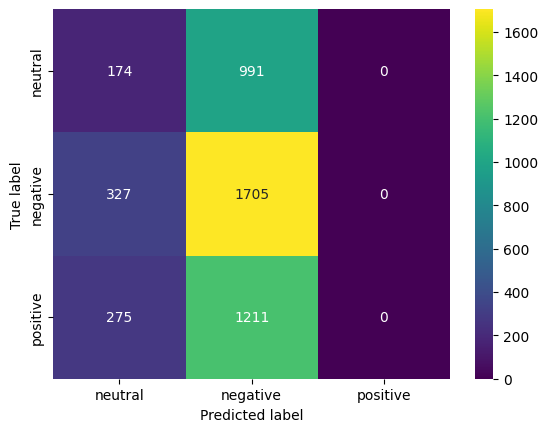

In [9]:
cf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)

sb.heatmap(cf_matrix,
           annot=True,
           fmt='d',
           cmap='viridis',
           xticklabels=['neutral','negative','positive'],
           yticklabels=['neutral','negative','positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## part 1-3: Connect two networks and obtain the final result

In [4]:
from faceAnalysis import ModelPip

In [34]:
ModelPip.train(batch_size=128, lr=1.e-3, epochs=20, workers=2, num_head=4, MSCTD_path='.',\
                model_path=os.path.join(root_dir,"checkpoints"))

Whole train set size: 20240
Validation set size: 5063


  0%|          | 0/20 [02:48<?, ?it/s]

[Epoch 1] Training accuracy: 0.3511. Loss: 1.089. LR 0.001000


  5%|▌         | 1/20 [03:14<1:01:29, 194.17s/it]

[Epoch 1] Validation accuracy:0.3612. bacc:0.3334. Loss:1.097
best_acc:0.3612
Model saved in : ./checkpoints/facePipModel.pth


  5%|▌         | 1/20 [06:29<1:01:29, 194.17s/it]

[Epoch 2] Training accuracy: 0.3513. Loss: 1.087. LR 0.000994


 10%|█         | 2/20 [06:51<1:02:24, 208.01s/it]

[Epoch 2] Validation accuracy:0.3599. bacc:0.3321. Loss:1.096
best_acc:0.3612


 10%|█         | 2/20 [09:56<1:02:24, 208.01s/it]

[Epoch 3] Training accuracy: 0.3527. Loss: 1.087. LR 0.000976


 15%|█▌        | 3/20 [10:20<59:04, 208.48s/it]  

[Epoch 3] Validation accuracy:0.3586. bacc:0.3309. Loss:1.096
best_acc:0.3612


 15%|█▌        | 3/20 [13:31<59:04, 208.48s/it]

[Epoch 4] Training accuracy: 0.3528. Loss: 1.087. LR 0.000946


 20%|██        | 4/20 [13:54<56:04, 210.31s/it]

[Epoch 4] Validation accuracy:0.3615. bacc:0.3336. Loss:1.095
best_acc:0.3615
Model saved in : ./checkpoints/facePipModel.pth


 20%|██        | 4/20 [17:00<56:04, 210.31s/it]

[Epoch 5] Training accuracy: 0.3510. Loss: 1.087. LR 0.000905


 25%|██▌       | 5/20 [17:25<52:43, 210.89s/it]

[Epoch 5] Validation accuracy:0.3604. bacc:0.3325. Loss:1.095
best_acc:0.3615


 25%|██▌       | 5/20 [20:38<52:43, 210.89s/it]

[Epoch 6] Training accuracy: 0.3531. Loss: 1.086. LR 0.000855


 25%|██▌       | 5/20 [21:04<52:43, 210.89s/it]

[Epoch 6] Validation accuracy:0.3625. bacc:0.3346. Loss:1.095
best_acc:0.3625


 30%|███       | 6/20 [21:09<50:12, 215.19s/it]

Model saved in : ./checkpoints/facePipModel.pth


 30%|███       | 6/20 [24:23<50:12, 215.19s/it]

[Epoch 7] Training accuracy: 0.3535. Loss: 1.087. LR 0.000796


 35%|███▌      | 7/20 [24:48<46:54, 216.51s/it]

[Epoch 7] Validation accuracy:0.3628. bacc:0.3348. Loss:1.095
best_acc:0.3628
Model saved in : ./checkpoints/facePipModel.pth


 35%|███▌      | 7/20 [27:35<46:54, 216.51s/it]

[Epoch 8] Training accuracy: 0.3527. Loss: 1.086. LR 0.000730


 40%|████      | 8/20 [28:00<41:42, 208.56s/it]

[Epoch 8] Validation accuracy:0.3595. bacc:0.3317. Loss:1.095
best_acc:0.3628


 40%|████      | 8/20 [31:05<41:42, 208.56s/it]

[Epoch 9] Training accuracy: 0.3522. Loss: 1.086. LR 0.000658


 45%|████▌     | 9/20 [31:31<38:23, 209.39s/it]

[Epoch 9] Validation accuracy:0.3601. bacc:0.3323. Loss:1.095
best_acc:0.3628


 45%|████▌     | 9/20 [34:41<38:23, 209.39s/it]

[Epoch 10] Training accuracy: 0.3520. Loss: 1.087. LR 0.000582


 50%|█████     | 10/20 [35:07<35:14, 211.47s/it]

[Epoch 10] Validation accuracy:0.3621. bacc:0.3342. Loss:1.095
best_acc:0.3628


 50%|█████     | 10/20 [38:08<35:14, 211.47s/it]

[Epoch 11] Training accuracy: 0.3539. Loss: 1.086. LR 0.000505


 55%|█████▌    | 11/20 [38:30<31:20, 208.97s/it]

[Epoch 11] Validation accuracy:0.3610. bacc:0.3332. Loss:1.095
best_acc:0.3628


 55%|█████▌    | 11/20 [41:31<31:20, 208.97s/it]

[Epoch 12] Training accuracy: 0.3531. Loss: 1.087. LR 0.000428


 60%|██████    | 12/20 [41:57<27:46, 208.31s/it]

[Epoch 12] Validation accuracy:0.3595. bacc:0.3318. Loss:1.095
best_acc:0.3628


 60%|██████    | 12/20 [45:03<27:46, 208.31s/it]

[Epoch 13] Training accuracy: 0.3539. Loss: 1.086. LR 0.000352


 65%|██████▌   | 13/20 [45:29<24:26, 209.45s/it]

[Epoch 13] Validation accuracy:0.3595. bacc:0.3318. Loss:1.095
best_acc:0.3628


 65%|██████▌   | 13/20 [48:30<24:26, 209.45s/it]

[Epoch 14] Training accuracy: 0.3541. Loss: 1.086. LR 0.000280


 70%|███████   | 14/20 [48:56<20:52, 208.77s/it]

[Epoch 14] Validation accuracy:0.3608. bacc:0.3330. Loss:1.096
best_acc:0.3628


Premature end of JPEG file
 70%|███████   | 14/20 [52:01<20:52, 208.77s/it]

[Epoch 15] Training accuracy: 0.3541. Loss: 1.086. LR 0.000214


 75%|███████▌  | 15/20 [52:23<17:20, 208.06s/it]

[Epoch 15] Validation accuracy:0.3595. bacc:0.3318. Loss:1.096
best_acc:0.3628


 75%|███████▌  | 15/20 [55:19<17:20, 208.06s/it]

[Epoch 16] Training accuracy: 0.3543. Loss: 1.086. LR 0.000155


 80%|████████  | 16/20 [55:43<13:42, 205.56s/it]

[Epoch 16] Validation accuracy:0.3597. bacc:0.3320. Loss:1.096
best_acc:0.3628


 80%|████████  | 16/20 [58:25<13:42, 205.56s/it]

[Epoch 17] Training accuracy: 0.3537. Loss: 1.086. LR 0.000105


 85%|████████▌ | 17/20 [58:50<10:00, 200.09s/it]

[Epoch 17] Validation accuracy:0.3601. bacc:0.3324. Loss:1.095
best_acc:0.3628


 85%|████████▌ | 17/20 [1:02:11<10:00, 200.09s/it]

[Epoch 18] Training accuracy: 0.3537. Loss: 1.086. LR 0.000064


 90%|█████████ | 18/20 [1:02:36<06:55, 207.84s/it]

[Epoch 18] Validation accuracy:0.3595. bacc:0.3318. Loss:1.095
best_acc:0.3628


 90%|█████████ | 18/20 [1:05:43<06:55, 207.84s/it]

[Epoch 19] Training accuracy: 0.3544. Loss: 1.086. LR 0.000034


 95%|█████████▌| 19/20 [1:06:22<03:33, 213.22s/it]

[Epoch 19] Validation accuracy:0.3597. bacc:0.3320. Loss:1.095
best_acc:0.3628


 95%|█████████▌| 19/20 [1:09:04<03:33, 213.22s/it]

[Epoch 20] Training accuracy: 0.3532. Loss: 1.086. LR 0.000016


100%|██████████| 20/20 [1:09:28<00:00, 208.43s/it]

[Epoch 20] Validation accuracy:0.3597. bacc:0.3320. Loss:1.095
best_acc:0.3628


In [5]:
y_true, y_pred = ModelPip.test(batch_size=128, workers=2, num_head=4, Facedataset_path='.',\
                                DAN_path=os.path.join(root_dir,"checkpoints","faceDAN.pth"),\
                                mixFace_path=os.path.join(root_dir,"checkpoints","facePipModel.pth"))

Test set size: 5067


100%|██████████| 40/40 [00:25<00:00,  1.58it/s]

test accuracy:0.4245. bacc:0.3418. Loss:2.485
best_acc:0.4245


In [6]:
print(classification_report(y_true=y_true, y_pred=y_pred, target_names=['neutral','negative','positive']))

              precision    recall  f1-score   support

     neutral       0.33      0.06      0.10      1298
    negative       0.43      0.94      0.59      2163
    positive       0.33      0.02      0.05      1606

    accuracy                           0.42      5067
   macro avg       0.36      0.34      0.25      5067
weighted avg       0.37      0.42      0.29      5067



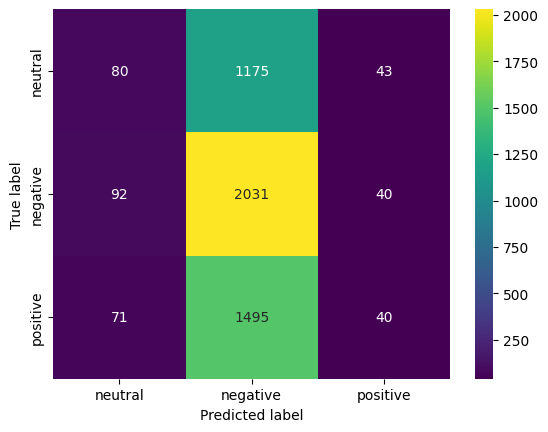

In [7]:
cf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)

sb.heatmap(cf_matrix,
           annot=True,
           fmt='d',
           cmap='viridis',
           xticklabels=['neutral','negative','positive'],
           yticklabels=['neutral','negative','positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## part 2-2: Test network with face augmentation

In [10]:
y_true, y_pred = faceSentiment.test(batch_size=128, workers=2, num_head=4, augmentation=['diffeo', 'color', 'filt'],\
                                    model_path=os.path.join(root_dir,"checkpoints","faceDAN.pth"), Facedataset_path='.')

Test set size: 54120
test accuracy:0.3968. bacc:0.3499


In [11]:
print(classification_report(y_true=y_true, y_pred=y_pred, target_names=['neutral','negative','positive']))

              precision    recall  f1-score   support

     neutral       0.37      0.25      0.30     18183
    negative       0.41      0.79      0.54     21246
    positive       0.25      0.01      0.02     14691

    accuracy                           0.40     54120
   macro avg       0.34      0.35      0.28     54120
weighted avg       0.35      0.40      0.32     54120



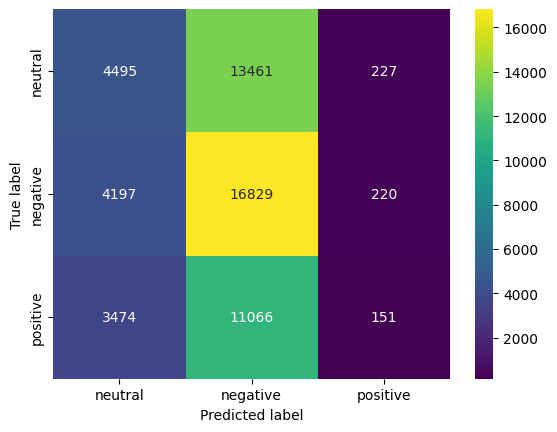

In [12]:
cf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)

sb.heatmap(cf_matrix,
           annot=True,
           fmt='d',
           cmap='viridis',
           xticklabels=['neutral','negative','positive'],
           yticklabels=['neutral','negative','positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## part 2-3: Training CNN with original and augmentation faces

In [13]:
faceSentiment.train(batch_size=128, lr=1.e-3, epochs=20, augmentation=['diffeo', 'color', 'filt'],\
                     workers=2, num_head=4, Facedataset_path='.',\
                        model_path=os.path.join(root_dir,"checkpoints"))

Whole train set size: 72376
Validation set size: 4587


  0%|          | 0/20 [01:13<?, ?it/s]

[Epoch 1] Training accuracy: 0.3912. Loss: 1.840. LR 0.001000


  0%|          | 0/20 [01:16<?, ?it/s]

[Epoch 1] Validation accuracy:0.3658. bacc:0.3379. Loss:1.778
best_acc:0.3658


  5%|▌         | 1/20 [01:17<24:25, 77.13s/it]

Model saved in : ./checkpoints/faceDAN_aug.pth


  5%|▌         | 1/20 [02:30<24:25, 77.13s/it]

[Epoch 2] Training accuracy: 0.3937. Loss: 1.731. LR 0.000994


 10%|█         | 2/20 [02:33<22:59, 76.63s/it]

[Epoch 2] Validation accuracy:0.3652. bacc:0.3369. Loss:1.735
best_acc:0.3658


 10%|█         | 2/20 [03:46<22:59, 76.63s/it]

[Epoch 3] Training accuracy: 0.3941. Loss: 1.698. LR 0.000976


 15%|█▌        | 3/20 [03:50<21:42, 76.61s/it]

[Epoch 3] Validation accuracy:0.3654. bacc:0.3371. Loss:1.720
best_acc:0.3658


 15%|█▌        | 3/20 [05:03<21:42, 76.61s/it]

[Epoch 4] Training accuracy: 0.3939. Loss: 1.684. LR 0.000946


 20%|██        | 4/20 [05:06<20:27, 76.69s/it]

[Epoch 4] Validation accuracy:0.3608. bacc:0.3327. Loss:1.720
best_acc:0.3658


 20%|██        | 4/20 [06:20<20:27, 76.69s/it]

[Epoch 5] Training accuracy: 0.3935. Loss: 1.679. LR 0.000905


 20%|██        | 4/20 [06:23<20:27, 76.69s/it]

[Epoch 5] Validation accuracy:0.3660. bacc:0.3377. Loss:1.716
best_acc:0.366


 25%|██▌       | 5/20 [06:23<19:12, 76.80s/it]

Model saved in : ./checkpoints/faceDAN_aug.pth


 25%|██▌       | 5/20 [07:37<19:12, 76.80s/it]

[Epoch 6] Training accuracy: 0.3940. Loss: 1.677. LR 0.000855


 30%|███       | 6/20 [07:40<17:56, 76.87s/it]

[Epoch 6] Validation accuracy:0.3564. bacc:0.3296. Loss:1.719
best_acc:0.366


 30%|███       | 6/20 [08:54<17:56, 76.87s/it]

[Epoch 7] Training accuracy: 0.3929. Loss: 1.675. LR 0.000796


 35%|███▌      | 7/20 [08:57<16:39, 76.87s/it]

[Epoch 7] Validation accuracy:0.3654. bacc:0.3371. Loss:1.713
best_acc:0.366


 35%|███▌      | 7/20 [10:11<16:39, 76.87s/it]

[Epoch 8] Training accuracy: 0.3937. Loss: 1.674. LR 0.000730


 40%|████      | 8/20 [10:14<15:22, 76.87s/it]

[Epoch 8] Validation accuracy:0.3625. bacc:0.3344. Loss:1.720
best_acc:0.366


 40%|████      | 8/20 [11:28<15:22, 76.87s/it]

[Epoch 9] Training accuracy: 0.3932. Loss: 1.673. LR 0.000658


 45%|████▌     | 9/20 [11:31<14:06, 76.92s/it]

[Epoch 9] Validation accuracy:0.3615. bacc:0.3334. Loss:1.720
best_acc:0.366


 45%|████▌     | 9/20 [12:45<14:06, 76.92s/it]

[Epoch 10] Training accuracy: 0.3946. Loss: 1.673. LR 0.000582


 50%|█████     | 10/20 [12:48<12:49, 76.96s/it]

[Epoch 10] Validation accuracy:0.3612. bacc:0.3337. Loss:1.712
best_acc:0.366


 50%|█████     | 10/20 [14:02<12:49, 76.96s/it]

[Epoch 11] Training accuracy: 0.3972. Loss: 1.672. LR 0.000505


 50%|█████     | 10/20 [14:05<12:49, 76.96s/it]

[Epoch 11] Validation accuracy:0.3713. bacc:0.3428. Loss:1.723
best_acc:0.3713


 55%|█████▌    | 11/20 [14:05<11:33, 77.05s/it]

Model saved in : ./checkpoints/faceDAN_aug.pth


 55%|█████▌    | 11/20 [15:19<11:33, 77.05s/it]

[Epoch 12] Training accuracy: 0.3975. Loss: 1.670. LR 0.000428


 60%|██████    | 12/20 [15:22<10:15, 76.99s/it]

[Epoch 12] Validation accuracy:0.3578. bacc:0.3301. Loss:1.723
best_acc:0.3713


 60%|██████    | 12/20 [16:36<10:15, 76.99s/it]

[Epoch 13] Training accuracy: 0.3972. Loss: 1.669. LR 0.000352


 65%|██████▌   | 13/20 [16:39<08:58, 76.90s/it]

[Epoch 13] Validation accuracy:0.3564. bacc:0.3296. Loss:1.719
best_acc:0.3713


 65%|██████▌   | 13/20 [17:52<08:58, 76.90s/it]

[Epoch 14] Training accuracy: 0.4013. Loss: 1.667. LR 0.000280


 70%|███████   | 14/20 [17:56<07:41, 76.87s/it]

[Epoch 14] Validation accuracy:0.3586. bacc:0.3326. Loss:1.722
best_acc:0.3713


 70%|███████   | 14/20 [19:09<07:41, 76.87s/it]

[Epoch 15] Training accuracy: 0.4040. Loss: 1.665. LR 0.000214


 75%|███████▌  | 15/20 [19:13<06:24, 76.88s/it]

[Epoch 15] Validation accuracy:0.3628. bacc:0.3379. Loss:1.719
best_acc:0.3713


 75%|███████▌  | 15/20 [20:26<06:24, 76.88s/it]

[Epoch 16] Training accuracy: 0.4060. Loss: 1.663. LR 0.000155


 80%|████████  | 16/20 [20:29<05:07, 76.85s/it]

[Epoch 16] Validation accuracy:0.3571. bacc:0.3369. Loss:1.727
best_acc:0.3713


 80%|████████  | 16/20 [21:43<05:07, 76.85s/it]

[Epoch 17] Training accuracy: 0.4097. Loss: 1.658. LR 0.000105


 85%|████████▌ | 17/20 [21:46<03:50, 76.88s/it]

[Epoch 17] Validation accuracy:0.3673. bacc:0.3418. Loss:1.727
best_acc:0.3713


 85%|████████▌ | 17/20 [23:00<03:50, 76.88s/it]

[Epoch 18] Training accuracy: 0.4153. Loss: 1.654. LR 0.000064


 90%|█████████ | 18/20 [23:03<02:33, 76.87s/it]

[Epoch 18] Validation accuracy:0.3615. bacc:0.3402. Loss:1.727
best_acc:0.3713


 90%|█████████ | 18/20 [24:17<02:33, 76.87s/it]

[Epoch 19] Training accuracy: 0.4168. Loss: 1.651. LR 0.000034


 95%|█████████▌| 19/20 [24:20<01:16, 76.83s/it]

[Epoch 19] Validation accuracy:0.3667. bacc:0.3452. Loss:1.728
best_acc:0.3713


 95%|█████████▌| 19/20 [25:34<01:16, 76.83s/it]

[Epoch 20] Training accuracy: 0.4225. Loss: 1.648. LR 0.000016


100%|██████████| 20/20 [25:37<00:00, 76.86s/it]

[Epoch 20] Validation accuracy:0.3601. bacc:0.3390. Loss:1.730
best_acc:0.3713


In [14]:
y_true, y_pred = ModelPip.test(batch_size=128, workers=2, num_head=4, Facedataset_path='.',\
                               DAN_path=os.path.join(root_dir,"checkpoints","faceDAN_aug.pth"),\
                               mixFace_path=os.path.join(root_dir,"checkpoints","facePipModel.pth"))

Test set size: 5067


100%|██████████| 40/40 [00:26<00:00,  1.49it/s]

test accuracy:0.4198. bacc:0.3386. Loss:2.476
best_acc:0.4198


In [15]:
print(classification_report(y_true=y_true, y_pred=y_pred, target_names=['neutral','negative','positive']))

              precision    recall  f1-score   support

     neutral       0.28      0.06      0.10      1298
    negative       0.43      0.93      0.59      2163
    positive       0.32      0.03      0.05      1606

    accuracy                           0.42      5067
   macro avg       0.34      0.34      0.25      5067
weighted avg       0.36      0.42      0.29      5067



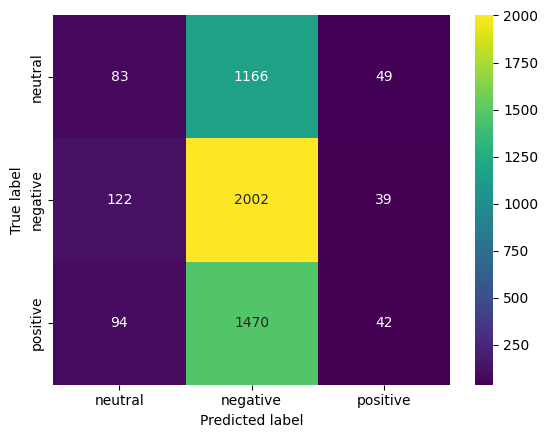

In [16]:
cf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)

sb.heatmap(cf_matrix,
           annot=True,
           fmt='d',
           cmap='viridis',
           xticklabels=['neutral','negative','positive'],
           yticklabels=['neutral','negative','positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

> ANALYSIS ???????????????????????????

# B) Sentiment anlysis with image's feature

In [17]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.models import resnet50, ResNet50_Weights
from torchsummary import summary

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [32]:
training_data.transformer = Compose([ToTensor(), Resize((224,224))])
valid_data.transformer = Compose([ToTensor(), Resize((224,224))])
test_data.transformer = Compose([ToTensor(), Resize((224,224))])

In [33]:
batch_size = 128
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [34]:
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [35]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear_relu_stack = nn.Sequential(

            nn.Linear(2048, 256),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(16, 3),
        )
        
    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [36]:
model.fc = MLP()

for param in model.parameters():
    param.requires_grad = False

for name, param in model.named_parameters():
    if 'layer4' in name:
        param.requires_grad = True
    if 'fc' in name:
        param.requires_grad = True

# for name, param in model.named_parameters():
#     print(name, param.requires_grad)

In [37]:
model.to(device)
summary(model,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [38]:
learning_rate = 1e-3

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [39]:
from tqdm import tqdm
def train_loop(epoch, dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    avgLoss = 0
    avgCorrect = 0
    model.train()
    with tqdm(dataloader, unit="batch") as tepoch:
        for  (X, text, y, idx) in tepoch:
            tepoch.set_description(f"Epoch {epoch+1}")
            # Compute prediction and loss
            size_batch = X[0].shape[0]
            X = X[0].to(device)
            y = torch.squeeze(torch.Tensor(np.array(y).astype(int)).to(torch.long))
            y = y.to(device)
            pred = model(X)
            loss = loss_fn(pred, y)
            avgLoss += loss.item()
            correct = (pred.argmax(1) == y).type(torch.float).sum().item()
            avgCorrect += correct
            
            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
            correct = correct / size_batch
            
            tepoch.set_postfix(batch_loss=loss.item(), batch_accuracy=100. * correct)
            
    avgLoss /= size
    avgCorrect /= size
    print(f" -Training Accuracy (Avg) = {(100*avgCorrect):>0.1f}%, Avg loss = {avgLoss:>8f} \n")
    return avgCorrect, avgLoss

def test_loop(dataloader, model, loss_fn, error):
    size = len(dataloader.dataset)
    avgLoss = 0
    avgCorrect = 0
    model.eval()
    with torch.no_grad():
        for (X, text, y, idx) in dataloader:
            # Compute prediction and loss
            X = X[0].to(device)
            y = torch.squeeze(torch.Tensor(np.array(y).astype(int)).to(torch.long))
            y = y.to(device)
            pred = model(X)
            avgLoss += loss_fn(pred, y).item()
            avgCorrect += (pred.argmax(1) == y).type(torch.float).sum().item()

    avgLoss /= size
    avgCorrect /= size
    print(f" -{error} : Accuracy = {(100*avgCorrect):>0.1f}%, Avg loss = {avgLoss:>8f} \n")
    return avgCorrect, avgLoss

In [40]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter(log_dir='tensorboard/ResNet50')

epochs = 5
for e in range(epochs):
    print(f" Epoch {e+1} -------------------------------")
    trainAcc, trainLoss = train_loop(e, train_dataloader, model, loss_fn, optimizer)
    writer.add_scalar('Accuracy/train', trainAcc, e)
    writer.add_scalar('Loss/train', trainLoss, e)

    valAcc, valLoss = test_loop(valid_dataloader, model, loss_fn, 'Validation')
    writer.add_scalar('Accuracy/validation', valAcc, e)
    writer.add_scalar('Loss/validation', valLoss, e)
    
print("Done!")

 Epoch 1 -------------------------------


Epoch 1: 100%|██████████| 159/159 [03:47<00:00,  1.43s/batch, batch_accuracy=37.5, batch_loss=1.12]


 -Training Accuracy (Avg) = 38.6%, Avg loss = 0.008570 

 -Validation : Accuracy = 36.5%, Avg loss = 0.008660 

 Epoch 2 -------------------------------


Epoch 2: 100%|██████████| 159/159 [03:44<00:00,  1.41s/batch, batch_accuracy=25, batch_loss=1.13]  


 -Training Accuracy (Avg) = 40.2%, Avg loss = 0.008530 

 -Validation : Accuracy = 36.6%, Avg loss = 0.008657 

 Epoch 3 -------------------------------


Epoch 3: 100%|██████████| 159/159 [03:49<00:00,  1.44s/batch, batch_accuracy=31.2, batch_loss=1.1] 


 -Training Accuracy (Avg) = 43.1%, Avg loss = 0.008404 

 -Validation : Accuracy = 36.8%, Avg loss = 0.008703 

 Epoch 4 -------------------------------


Epoch 4: 100%|██████████| 159/159 [04:23<00:00,  1.65s/batch, batch_accuracy=56.2, batch_loss=0.925]


 -Training Accuracy (Avg) = 47.9%, Avg loss = 0.008068 

 -Validation : Accuracy = 36.8%, Avg loss = 0.008937 

 Epoch 5 -------------------------------


Epoch 5: 100%|██████████| 159/159 [04:29<00:00,  1.69s/batch, batch_accuracy=56.2, batch_loss=0.862]


 -Training Accuracy (Avg) = 54.3%, Avg loss = 0.007373 

 -Validation : Accuracy = 36.5%, Avg loss = 0.009356 

Done!


In [41]:
test_loop(test_dataloader, model, loss_fn, 'Test');

 -Test : Accuracy = 40.1%, Avg loss = 0.008979 



In [42]:
y_pred = []
y_true = []

with torch.no_grad():
    for (X, temp1, y, temp2)  in test_dataloader:
        X = X[0].to(device)
        y = torch.squeeze(torch.Tensor(np.array(y).astype(int)).to(torch.long))
        y = y.to(device)
        pred = model(X)
        output = pred.argmax(1).cpu().numpy()
        y_pred.extend(output)
        label = y.cpu().numpy()
        y_true.extend(label)

In [43]:
print(classification_report(y_true=y_true, y_pred=y_pred, target_names=['neutral','negative','positive']))

              precision    recall  f1-score   support

     neutral       0.26      0.17      0.20      1298
    negative       0.43      0.84      0.57      2163
    positive       0.00      0.00      0.00      1606

    accuracy                           0.40      5067
   macro avg       0.23      0.34      0.26      5067
weighted avg       0.25      0.40      0.29      5067



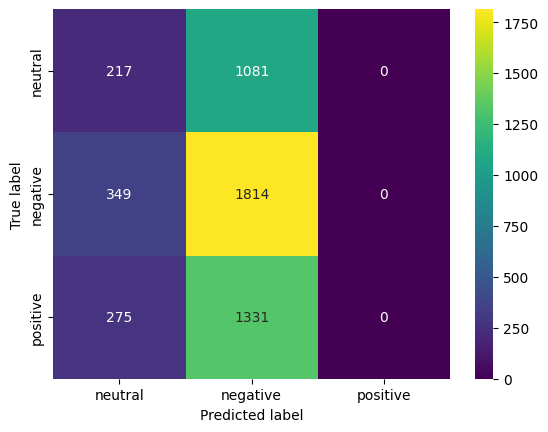

In [44]:
cf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)

sb.heatmap(cf_matrix,
           annot=True,
           fmt='d',
           cmap='viridis',
           xticklabels=['neutral','negative','positive'],
           yticklabels=['neutral','negative','positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [45]:
torch.save(model.state_dict(), 'checkpoints/imageResNet50.pth')

> We get better accuracy because the model uses whole images instead of faces.??????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????

# C) Sentiment analysis using the combination of the two last parts

In [54]:
from libs.mergeImageFaceNetworks import mergeImageFaceNetwork

In [55]:
training_data.transformer = Compose([])
test_data.transformer = Compose([])

In [58]:
merge2networks = mergeImageFaceNetwork(modelPath_image='checkpoints/imageResNet50.pth',modelPath_face='checkpoints/facePipModel.pth')

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/user01/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/genderage.onnx genderage
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
model ignore: /home/user01/.insightface/models/buffalo_l/w600k_r50.onnx recognition
set det-size: (640, 640)


In [ ]:
merge2networks.train(training_data, modelPath_pred='checkpoints/prediction.pth')

In [59]:
y_pred = merge2networks.run(test_data, modelPath_predict='checkpoints/prediction.pth')

100%|██████████| 5067/5067 [08:25<00:00, 10.03it/s]


 - Test Accuracy = 42.4



[tensor([-0.2771,  0.4826, -0.9164], device='cuda:0'),
 tensor([-0.3660,  0.6852, -0.6667], device='cuda:0'),
 tensor([-0.4683,  0.6842, -0.6462], device='cuda:0'),
 tensor([-0.4277,  0.5882, -0.7531], device='cuda:0'),
 tensor([-0.5359,  0.7505, -0.5752], device='cuda:0'),
 tensor([-0.3749,  0.4407, -0.9126], device='cuda:0'),
 tensor([-0.2625,  0.4595, -0.9617], device='cuda:0'),
 tensor([-0.3434,  0.5950, -0.7752], device='cuda:0'),
 tensor([-0.1821,  0.4264, -0.9126], device='cuda:0'),
 tensor([ 0.4729,  0.5275, -1.1597], device='cuda:0'),
 tensor([-0.3733,  0.5900, -0.7652], device='cuda:0'),
 tensor([-0.0880,  0.4577, -0.9856], device='cuda:0'),
 tensor([-0.4388,  0.7069, -0.6284], device='cuda:0'),
 tensor([-0.3161,  0.4417, -0.9226], device='cuda:0'),
 tensor([-0.2956,  0.5529, -0.8562], device='cuda:0'),
 tensor([-0.1988,  0.2267, -0.0935], device='cuda:0'),
 tensor([-0.5715,  0.8386, -0.4765], device='cuda:0'),
 tensor([-0.4746,  0.6380, -0.7000], device='cuda:0'),
 tensor([-

In [61]:
y_true = list(map(int,test_data.sentiment))

[1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,


In [ ]:
print(classification_report(y_true=y_true, y_pred=y_pred, target_names=['neutral','negative','positive']))

In [ ]:
cf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)

sb.heatmap(cf_matrix,
           annot=True,
           fmt='d',
           cmap='viridis',
           xticklabels=['neutral','negative','positive'],
           yticklabels=['neutral','negative','positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()